In [1]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns


df = pd.read_csv('../Dataset/all_var_int.csv')
df.describe()

/var/folders/cd/prkj0t8j32v902v1n0cr3s6h0000gn/T/ipykernel_59369/1289112181.py:9: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Dataset/all_var_int.csv')


,FID_Key,state_code,district_code,block_code,objectid,stcode11,drought_frq,storm_freq,flood_freq,rural_pop,...,joint_acc_of_women_ratio,num_women_beneficiary_worker_with_acc_ratio,active_women_beneficiary_worker_with_acc_ratio,pmuy_ratio,shg_loan_per_shg,loan_per_shg,ratio_women_reg_workers_with_joint_acc,crp_vul_index,rainfed_farmland_ratio,gw_missing_flag
count,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5.815000e+03,...,5815.000000,5815.000000,5815.000000,5815.000000,5.815000e+03,5.815000e+03,5815.000000,5815.000000,5815.000000,5815.000000
mean,3744.730181,19.342218,362.509028,3424.578504,3459.751849,19.834910,3.081169,11.045572,22.271883,4.268809e+06,...,0.065415,0.814762,0.678983,0.247614,2.393990e+04,2.393990e+04,0.125774,0.110437,0.435247,0.004471
std,1998.031178,9.939108,195.339992,1951.511798,2106.574036,10.560126,2.103926,9.441698,14.123303,3.745933e+06,...,0.138342,0.167105,0.169635,0.132712,3.742710e+04,3.742710e+04,0.348387,0.077240,0.244583,0.066723
min,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1976.500000,9.000000,192.000000,1709.500000,1566.500000,9.000000,2.000000,3.000000,13.000000,1.569976e+06,...,0.003759,0.740155,0.584582,0.148857,4.916442e+03,4.916442e+03,0.009136,0.053663,0.232255,0.000000
50%,3670.000000,20.000000,356.000000,3408.000000,3289.000000,20.000000,3.000000,7.000000,21.000000,3.293788e+06,...,0.016412,0.865589,0.694471,0.239051,1.410389e+04,1.410389e+04,0.037012,0.097759,0.426119,0.000000
75%,5519.500000,27.000000,517.000000,5085.500000,5394.500000,27.000000,5.000000,20.000000,32.000000,6.076031e+06,...,0.062226,0.936591,0.801318,0.335610,3.248097e+04,3.248097e+04,0.119173,0.155059,0.617262,0.000000
max,7133.000000,38.000000,734.000000,7417.000000,7136.000000,39.000000,8.000000,38.000000,60.000000,3.173207e+07,...,2.311789,1.000000,1.000000,0.847415,1.705000e+06,1.705000e+06,18.176471,0.681558,1.000000,1.000000


In [2]:
normcols=['crp_vul_index','rainfed_farmland_ratio','sc_ratio', 'st_ratio', 'gen_ratio','anaemic_pregnant_ratio', 'anaemic_adolescent_ratio','kutchha_ratio']
invertcols =['hh_non_farm_ratio']

drought_df = df[normcols+invertcols]



In [3]:
drought_df['hh_non_farm_ratio'] = 1/(1+drought_df['hh_non_farm_ratio'])
drought_df['sc_ratio'] = drought_df['sc_ratio'].clip(upper=1)
drought_df['st_ratio'] = drought_df['st_ratio'].clip(upper=1)
drought_df['gen_ratio'] = drought_df['gen_ratio'].clip(upper=1)

/var/folders/cd/prkj0t8j32v902v1n0cr3s6h0000gn/T/ipykernel_59369/535868124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drought_df['hh_non_farm_ratio'] = 1/(1+drought_df['hh_non_farm_ratio'])
/var/folders/cd/prkj0t8j32v902v1n0cr3s6h0000gn/T/ipykernel_59369/535868124.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drought_df['sc_ratio'] = drought_df['sc_ratio'].clip(upper=1)
/var/folders/cd/prkj0t8j32v902v1n0cr3s6h0000gn/T/ipykernel_59369/535868124.py:3: SettingWithCopyWarning: 
A value is trying 

In [4]:
drought_df.describe()
# theres some issue in sc_ratio	st_ratio gen_ratio, the max of these ratios is going above 1 which should not be happening.

,crp_vul_index,rainfed_farmland_ratio,sc_ratio,st_ratio,gen_ratio,anaemic_pregnant_ratio,anaemic_adolescent_ratio,kutchha_ratio,hh_non_farm_ratio
count,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000
mean,0.110437,0.435247,0.160667,0.134059,0.620903,0.002590,0.003223,0.214618,0.823465
std,0.077240,0.244583,0.099293,0.230244,0.222226,0.002081,0.003609,0.162366,0.068382
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.510868
25%,0.053663,0.232255,0.090493,0.001781,0.512017,0.001166,0.000895,0.090219,0.786604
50%,0.097759,0.426119,0.152866,0.022706,0.645237,0.002184,0.002197,0.182846,0.830556
75%,0.155059,0.617262,0.215874,0.144126,0.761862,0.003485,0.004228,0.301258,0.870616
max,0.681558,1.000000,1.000000,1.000000,1.000000,0.033202,0.047404,0.999543,1.000000


In [5]:
Rscaler = RobustScaler()
df_scaled = drought_df.copy()
cols = normcols+invertcols
df_scaled[cols] = Rscaler.fit_transform(drought_df[cols])

In [6]:
df_pca = df_scaled.drop(columns=['block_code', 'FID_Key','total_villages', 'geog_area'],errors='ignore')
df_pca.replace('', np.nan, inplace=True)
df_pca = df_pca.astype(float)

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df_pca)

PCA()

In [7]:
pcaSummary_df = pd.DataFrame({
            '% variance': pca.explained_variance_ratio_,
            'Cumulative %': np.cumsum(pca.explained_variance_ratio_)
             })
# round(3) function rounds to 3 decimals
pcaSummary_df.round(3)



,% variance,Cumulative %
0,0.451,0.451
1,0.184,0.635
2,0.093,0.728
3,0.075,0.803
4,0.060,0.863
5,0.041,0.904
6,0.038,0.942
7,0.034,0.977
8,0.023,1.000


In [8]:
PCA_weights = pcaSummary_df['% variance']

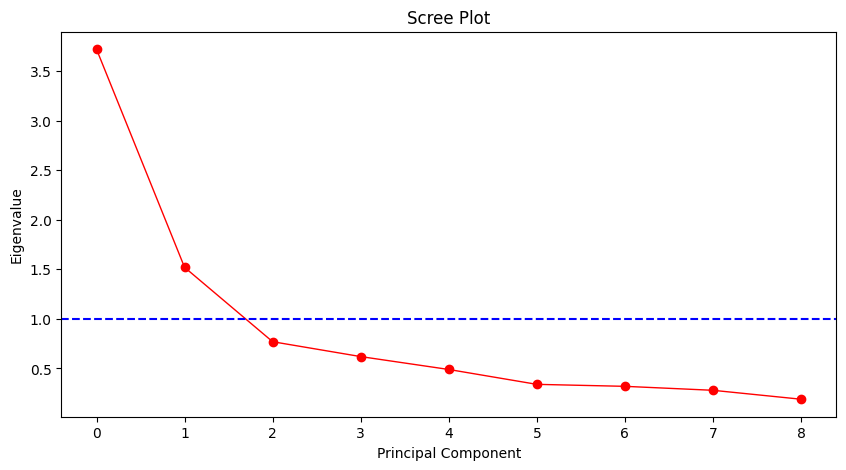

In [9]:
# scree plot of eigenvalues
# define the x values, i.e., components
#Eigenvalues are given by the PCA explained_variance_ method
eig = pca.explained_variance_.round(2) #explained variance method

xvals = np.arange(df_pca.shape[1]);
#figure size
plt.figure(figsize=(10,5))
#plot in red color
plt.plot(xvals, eig, 'ro-', linewidth=1)
#set ticks to every unit
plt.xticks(xvals)

#add labels...
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

#add a horizontal line in blue for latent root criterion
plt.axhline(y=1, color='b', linestyle='--')

#look for inflection point --> 2 is the major inflection point 
# philip said keep points before this --> that is 2 

In [10]:
# Fit PCA for all components (you already have this)
pca = PCA(n_components=7)
pca.fit(df_pca)

# Extract loadings (weights of variables for each PC)
loadings = pd.DataFrame(
    pca.components_.T,  # Transpose to align variables with components
    columns=[f"PC{i+1}" for i in range(7)],  # Name components as PC1, PC2, ...
    index=df_pca.columns  # Original variable names
)

# Display loadings
print(loadings)

                               PC1       PC2       PC3       PC4       PC5  \
crp_vul_index            -0.156455  0.120877  0.593984 -0.294676 -0.308697   
rainfed_farmland_ratio    0.123353 -0.059619 -0.406059  0.294458  0.267093   
sc_ratio                 -0.188045  0.059267  0.368224  0.021242  0.855542   
st_ratio                  0.806249 -0.252710  0.063323 -0.219860  0.004878   
gen_ratio                -0.343698  0.103557 -0.390867  0.129310 -0.195239   
anaemic_pregnant_ratio    0.168107  0.565158  0.038976 -0.038535 -0.027756   
anaemic_adolescent_ratio  0.210278  0.750048 -0.188043 -0.157787  0.092898   
kutchha_ratio             0.263021  0.023232  0.045939  0.324648  0.078324   
hh_non_farm_ratio         0.122972  0.145673  0.388501  0.793204 -0.218490   

                               PC6       PC7  
crp_vul_index             0.035370  0.294688  
rainfed_farmland_ratio    0.007033 -0.031891  
sc_ratio                 -0.061762  0.007227  
st_ratio                 -0.160

In [11]:
# Add PCA scores to the DataFrame with renamed components
pca_scores = pca.transform(df_pca)

# Assign PCA scores to their respective components
for i, name in enumerate(loadings.columns):
    df_scaled[f"Drought_Sensitivity_{name}"] = pca_scores[:, i]

# Check the updated DataFrame
print(df_scaled.head())

   crp_vul_index  rainfed_farmland_ratio  sc_ratio  st_ratio  gen_ratio  \
0      -0.964132                0.191896 -1.219213  0.806842   1.419932   
1      -0.964132                0.827787 -1.219213 -0.139519   1.174098   
2       1.033458                0.221166 -0.344225  0.029332   0.217096   
3       0.520406                0.303094 -0.186645  0.555741   0.174699   
4       0.896969                0.694157  0.208061  0.392840   0.050217   

   anaemic_pregnant_ratio  anaemic_adolescent_ratio  kutchha_ratio  \
0               -0.797823                  1.045830      -0.602859   
1               -0.564312                 -0.221425       1.580553   
2               -0.154455                 -0.039747       0.137461   
3               -0.265702                  0.407581       0.989721   
4                0.604802                  2.596688       0.914066   

   hh_non_farm_ratio  Drought_Sensitivity_PC1  Drought_Sensitivity_PC2  \
0           1.563893                -0.073408         

In [12]:
# Multiply each PCA component score by its weight
df["Drought_Sensitivity_Index"] = (
    PCA_weights[0] * df_scaled["Drought_Sensitivity_PC1"] +
    PCA_weights[1] * df_scaled["Drought_Sensitivity_PC2"] +
    PCA_weights[2] * df_scaled["Drought_Sensitivity_PC3"] +
    PCA_weights[3] * df_scaled["Drought_Sensitivity_PC4"] +
    PCA_weights[4] * df_scaled["Drought_Sensitivity_PC5"] +
    PCA_weights[5] * df_scaled["Drought_Sensitivity_PC6"] +
    PCA_weights[6] * df_scaled["Drought_Sensitivity_PC7"]
)

# Display the flood_exposure Index
print(df[["block_code", "Drought_Sensitivity_Index"]].head())

   block_code  Drought_Sensitivity_Index
0        6498                  -0.173916
1        6492                  -0.630068
2        4689                  -0.700446
3        4690                   0.017583
4        4692                   0.635607


In [13]:
df["Drought_Sensitivity_Index"].describe()

count    5815.000000
mean        0.000000
std         0.906017
min        -1.603195
25%        -0.584417
50%        -0.256159
75%         0.290739
max         5.748732
Name: Drought_Sensitivity_Index, dtype: float64